In [46]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
#Imports possibly useful software for Python
t=Table.read('TGAS_d125_Wright03_2Mass.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["__Gmag_"]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
SpType=t["SpType"]
#Defines SpectralType from the table
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array

The columns within this catalog are: 
['d_arcsec', 'd_arcsec_2', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType', '_2MASS', 'RAJ2000_2', 'DEJ2000_2', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [62]:
Distance=1000./t["Plx"]
#Defines the distance to the stars
Jabsmag=Jmag+5-5*numpy.log10(Distance)
Habsmag=Hmag+5-5*numpy.log10(Distance)
Kabsmag=Kmag+5-5*numpy.log10(Distance)
Gabsmag=Gmag+5-5*numpy.log10(Distance)
Vabsmag=Vmag+5-5*numpy.log10(Distance)
Babsmag=Bmag+5-5*numpy.log10(Distance)

In [48]:
TranslatedLuminosityClass=[0.0]*len(SpType)
#Makes this an array of 0's with the same length as SpectralType
for i in range(0,len(SpType)):
    SpT=SpType[i].decode()
    if len(SpT)>2:
        for j in range(0,len(SpT)):
            if SpT[j]=='I':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+1
            if SpT[j]=='V':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]+5
            if SpT[j]=='+':
                TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
    else:
        TranslatedLuminosityClass[i]=5.1
    if TranslatedLuminosityClass[i]==6:
        TranslatedLuminosityClass[i]=4
    if TranslatedLuminosityClass[i]==11:
        TranslatedLuminosityClass[i]=4.5
    if TranslatedLuminosityClass[i]==9:
        TranslatedLuminosityClass[i]=3.5
    if TranslatedLuminosityClass[i]>5.2:
        TranslatedLuminosityClass[i]=TranslatedLuminosityClass[i]-30
#Runs a loop that "translates" luminosity classes into Arabic numerals, 5.1 for no class, negative numbers for binaries or weird stars, or half-integer numbers for slash stars
BinariesOrUnknownClass=0
#Sets this number at 0
for k in range(0,len(SpType)):
    if TranslatedLuminosityClass[k]<0 or TranslatedLuminosityClass[k]>5:
        BinariesOrUnknownClass=BinariesOrUnknownClass+1
        #Adds 1 to number of binary/unknwon luminosity class stars for "translated" class less than 0 or greater than 5
SingleStarsWithKnownLuminosityClass=len(SpType)-BinariesOrUnknownClass
print('The number of single stars with known luminosity class is: ')
print(SingleStarsWithKnownLuminosityClass)
print('The number of binary stars or stars with unknown luminosity class is: ')
print(BinariesOrUnknownClass)
#Prints out the number of single stars with known luminosity class, and binary stars or stars without a luminosity class
print('The "translated" luminosity classes are: ')
print(TranslatedLuminosityClass)
#Prints out the vector of "translated" luminosity class numbers
#Luminosity classes get turned into number from 1 to 5
#Stars with no luminosity class have "translated" class 5.1
#Unknown spectral type stars and binary stars have negative "translated" class numbers
#Stars with "translated" class numbers halfway between numbers (i.e. 3.5, 4.5, etc.) had slashes (i.e. III/IV)

The number of single stars with known luminosity class is: 
19058
The number of binary stars or stars with unknown luminosity class is: 
12646
The "translated" luminosity classes are: 
[5.1, 5.0, 4, 5.0, 5.0, 5.1, 3.5, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 4, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, -25.0, 5.1, -27.0, 4, 5.0, 5.0, 4.5, 4.5, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 4.5, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, -27.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 3.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, -25.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 4, 5.1, 5.1, 5.0, 5.1, 5.0, 4.5, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 4, 5.0, 5.1, 5.1, 3.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.0, -25.0, 5.1, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.0, 4.5, 5.1, 5.0, 5.0, 5.1, 5.0, 4, 5.0, 5.0, 5.0, 5.0, 5.1, 5.0, 5.1, 5.0, 5.0, 3.0, 5.0, 5.1, 5.1, 3.0, 5.0, 3.5, 5.0, 5

In [53]:
JEffWavelength=1220
HEffWavelength=1630
KEffWavelength=2190
GEffWavelength=600
VEffWavelength=551
BEffWavelength=445
EffWavelengths=[BEffWavelength,VEffWavelength,GEffWavelength,JEffWavelength,HEffWavelength,KEffWavelength]

In [68]:
MainSequenceJabsmag=[]
MainSequenceHabsmag=[]
MainSequenceKabsmag=[]
MainSequenceGabsmag=[]
MainSequenceVabsmag=[]
MainSequenceBabsmag=[]
MainSequenceTeff=[]
#Defines empty vectors for the magnitudes for stars with luminosity class V (5) (main sequence)
for i in range(0,len(TranslatedLuminosityClass)):
    if TranslatedLuminosityClass[i]==5:
        MainSequenceJabsmag.append(Jabsmag[i])
        MainSequenceHabsmag.append(Habsmag[i])
        MainSequenceKabsmag.append(Kabsmag[i])
        MainSequenceGabsmag.append(Gabsmag[i])
        MainSequenceVabsmag.append(Vabsmag[i])
        MainSequenceBabsmag.append(Babsmag[i])
        MainSequenceTeff.append(Teff[i])
#If the "translated" luminosity class number is 5 (main sequence), appends the corresponding magnitude to the main sequence magnitudes arrays
print('The number of main sequence stars is: ')
print(len(MainSequenceJabsmag))
#Prints the number of main sequence stars
print(MainSequenceBabsmag) 
print(numpy.average(MainSequenceBabsmag))
print(MainSequenceJabsmag)
print(numpy.average(MainSequenceJabsmag))

The number of main sequence stars is: 
15260
[4.5285549, 7.9016852, 9.006567, 5.1860218, 6.8740311, 2.8830338, 7.6129379, 5.745265, 4.9843884, 4.5741148, 4.7680454, 6.0174456, 7.7889614, 5.040638, 4.5339832, 5.5792108, 6.9041243, 3.9608717, 3.4082804, 4.0286889, 5.2908316, 5.1302567, 4.4422894, 4.0899963, 4.2476711, 5.2638216, 4.4368401, 4.4372892, 3.8104496, 4.8530455, 7.633853, 3.5593433, 6.0537052, 3.7404194, 4.2264519, 4.9336195, 5.3621759, 6.7679901, 3.9779987, 3.7359009, 7.6205201, 5.6993771, 5.3959904, 4.7469397, 5.8327808, 5.6751862, 6.0141087, 4.6605129, 5.0636816, 5.0596781, 4.5868416, 5.224369, 5.3933773, 5.3933773, 5.0933676, 5.7341413, 5.7341413, 5.8172541, 4.7451906, 5.9497261, 5.4979544, 5.5354872, 4.4566555, 4.1031599, 4.5992212, 4.1922836, 5.4791594, 6.3805552, 4.4525452, 4.3856297, 4.5665398, 4.3390055, 3.7370787, 4.3467426, 3.6666183, 4.5990791, 6.4159803, 4.2213888, 3.5738478, 5.8827276, 5.1550932, 4.6981049, 2.9293852, 4.6575918, 4.3604174, 5.6819468, 5.6620979, 3.

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


*****Effective Temperature 3000-3500 K*****
The number of main sequence stars in the effective temperature range 3000-3500 is:  1
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)



The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 10.12791634]
10.1279163361


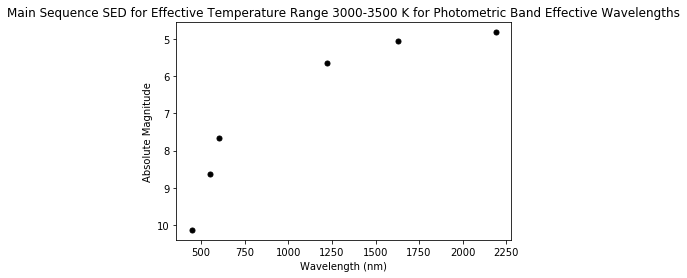

*****Effective Temperature 3500-4000 K*****
The number of main sequence stars in the effective temperature range 3500-4000 is:  34
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 111.711
[-- -- -- ..., -- -- --]
[ 10.71055412  10.13746643   9.77056026   9.79394245  10.11532021
   8.99818611  10.84879017  10.19291496  11.78845787  11.21395874
  10.23002434   9.99350739  10.59253216   9.4313221   10.80799484
  10.23775387  11.22423458   9.97332573   9.88476849  10.16763687
  11.93914223  10.00427532   8.89052391   9.52598286  10.56493092
  10.90809059   9.95975685  10.17660618  10.2898674   11.16703987
  11.18351841   9.86994362   9.9024868   10.88571548]
10.3347391802


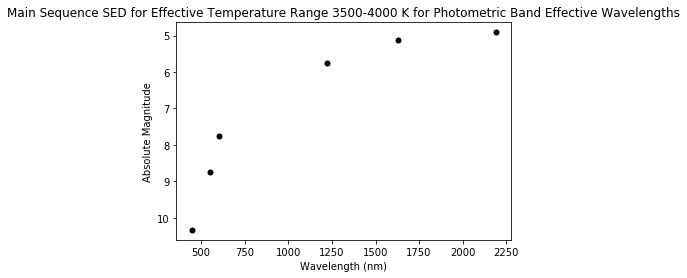

*****Effective Temperature 4000-4500 K*****
The number of main sequence stars in the effective temperature range 4000-4500 is:  142
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 134.95
[-- -- 9.006567001342773 ..., -- -- --]
[  9.006567     8.90822315   9.70926857   8.86272049   9.70057011
   8.54670238   9.02860355   8.43210411   8.94587708   8.5240612
   8.83886909   8.02031994   8.99801064   9.39864731   8.05494499
   7.43631744   8.8586235    9.56548882   8.30433655   9.99790764
   8.30472755   7.83648491  10.0300293   10.0260458    8.34234047
   9.62540817   9.65382385   9.72089672   7.83818626   9.1890583
   9.46273422  10.02035332   9.65195656   9.92449188   9.23588562
   9.56549931   8.6702137    8.65774727   

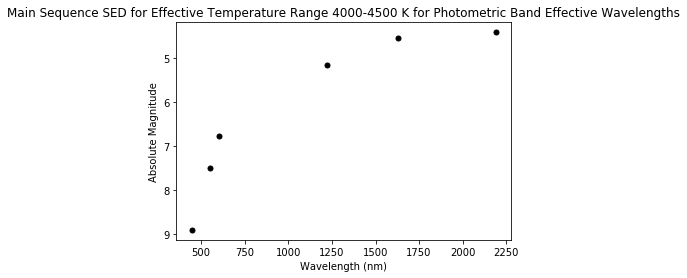

*****Effective Temperature 4500-5000 K*****
The number of main sequence stars in the effective temperature range 4500-5000 is:  490
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 114.219
[-- 7.9016852378845215 -- ..., -- -- --]
[  7.90168524   7.61293793   7.78896141   7.63385296   7.62052011
   7.15836048   7.16668653   7.31821346   7.72971535   8.37613392
   7.64723444   8.42855453   7.57262325   6.91544151   8.94060612
   7.60495281   2.1660471    8.52113152   8.06114292   7.18064308
   8.55253124   8.75295448   7.50029182   7.58593464   8.06699657
   7.73764896   6.79494667   8.86919022   8.55199051   7.23137379
   9.65251923   7.67372227   7.63122463   6.91242886   7.9095974
   7.60375404   7.33266592   6.79682922

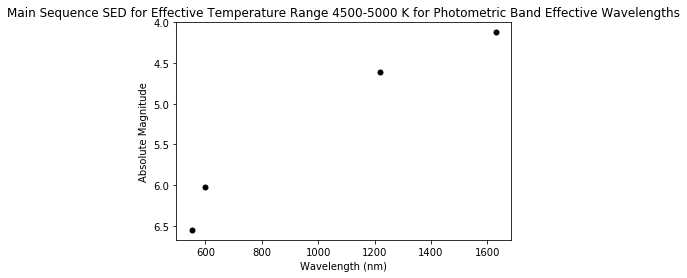

*****Effective Temperature 5000-5500 K*****
The number of main sequence stars in the effective temperature range 5000-5500 is:  687
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 82.8941
[-- -- -- ..., -- -- --]
[ 6.87403107  6.90412426  6.38945675  7.54265213  6.93942261  6.95273685
  7.17023468  6.79067993  5.3551302   4.58967781  6.87926292  4.52220821
  6.49433708  7.25323009  7.04766178  6.63609886  6.98080444  7.7475915
  6.76515961  7.01189423  5.73576736  5.85819149  6.01423073  6.31652355
  6.8933363   6.76857758  4.46843529  7.05838299  6.78738213  6.29058266
  6.9043169   7.04726887  7.17889977  6.40066338  6.40113926  6.85672951
  6.93478489  7.14505148  7.08324146  7.44129181  6.20125294  7.48942375
  6.94

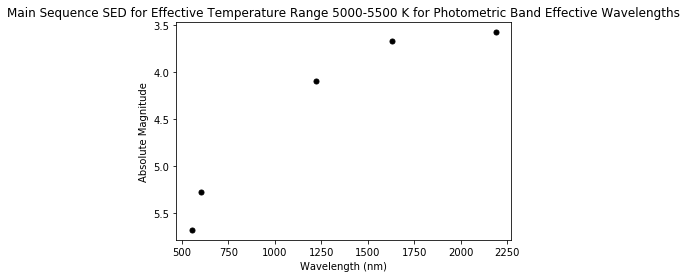

*****Effective Temperature 5500-6000 K*****
The number of main sequence stars in the effective temperature range 5500-6000 is:  5115
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 98.9612
[-- -- -- ..., -- -- 4.78389835357666]
[ 5.1860218   5.74526501  6.01744556 ...,  4.26100826  5.035779    4.78389835]
nan


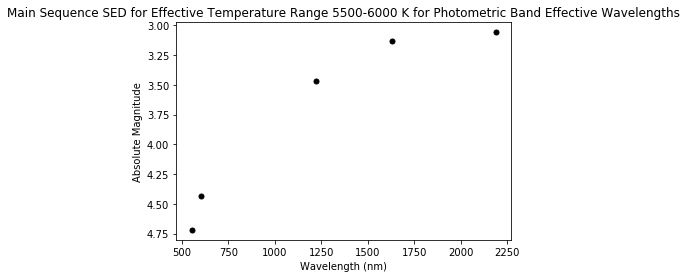

*****Effective Temperature 6000-6500 K*****
The number of main sequence stars in the effective temperature range 6000-6500 is:  6416
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 181.129
[-- -- -- ..., 4.97635555267334 -- --]
[ 4.98438835  4.5741148   4.76804543 ...,  4.89511871  4.97635555
  4.97635555]
nan


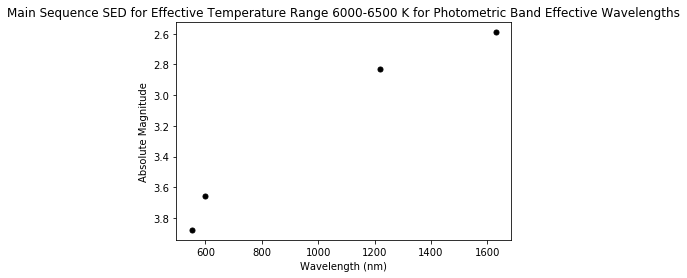

*****Effective Temperature 6500-7000 K*****
The number of main sequence stars in the effective temperature range 6500-7000 is:  1374
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: 6870
The maximum effective temperature of a main sequence star in this range is: 6890
The standard deviation of the effective temperatures of main sequence stars in this range is: 0.933518
[4.528554916381836 -- -- ..., -- 4.519452095031738 --]
[ 4.52855492  3.8104496   3.74041939 ...,  3.72628212  3.83369827
  4.5194521 ]
3.67635545633


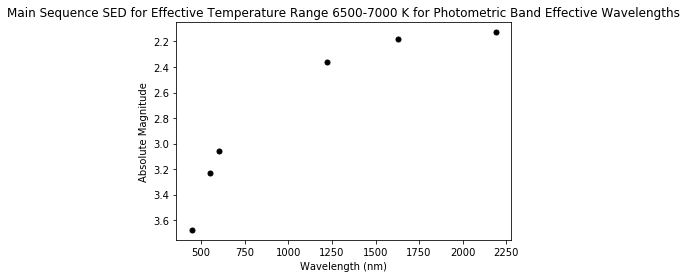

*****Effective Temperature 7000-7500 K*****
The number of main sequence stars in the effective temperature range 7000-7500 is:  307
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 24.7728
[-- -- -- ..., -- -- --]
[ 3.06811047  3.24507141  3.60094738  3.28947639  3.05180359  3.18482971
  3.66528797  3.2329874   2.52471161  3.89709377  3.15308189  3.07305717
  3.84847641  3.33295059  2.5023737   1.94094849  2.04899883  4.08363533
  3.93396473  2.92942905  4.84673405  2.82628536  2.74290657  3.14999866
  3.96705341  3.80762768  3.11811924  3.56025791  3.47384167  3.47384167
  3.73587894  3.41897488  3.25301361  3.19556046  3.14984512  3.29533005
  3.40687561  2.50728035  3.46609879  3.24828053  3.93435287  2.67607975
  2.2

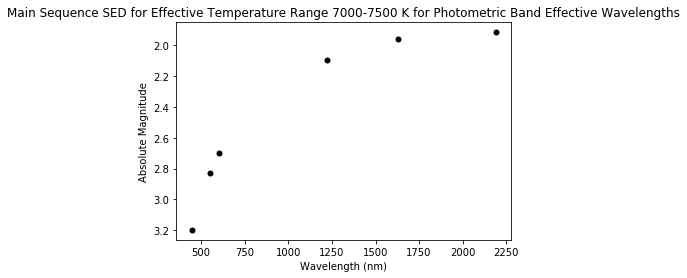

*****Effective Temperature 7500-8000 K*****
The number of main sequence stars in the effective temperature range 7500-8000 is:  178
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 29.6425
[-- -- -- ..., -- -- --]
[ 2.88303375  2.72455978  2.97603321  2.97369671  3.31633568  2.9588089
  2.94755936  2.1688633   2.55582237  3.66505718  2.55920887  2.69321251
  2.92133045  2.72316837  3.16379929  2.55392456  3.21788788  2.65397549
  3.20507145  2.31106949  2.44441319  2.06494999  3.63599777  2.89113712
  2.12805367  2.50482464  2.34834385  3.34660149  2.89470863  2.8565979
  2.14501095  2.91113186  2.46836758  2.12710476  2.34737682  3.05979919
  2.78490353  2.84361267  3.1776228   1.79839706  2.19604015  3.39633179
  2.840

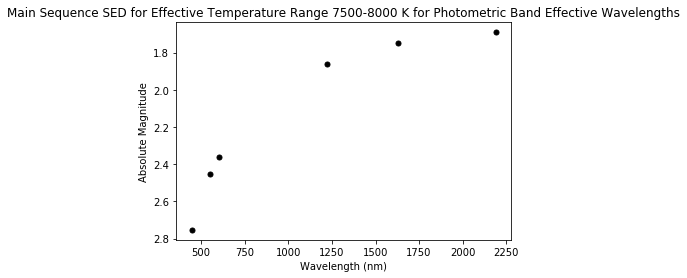

*****Effective Temperature 8000-8500 K*****
The number of main sequence stars in the effective temperature range 8000-8500 is:  70
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 23.2115
[-- -- -- ..., -- -- --]
[ 2.2032671   1.92167664  1.62391376  1.17528439  2.5255928   2.5250864
  2.61930847  1.44179916  2.38310432  2.6728363   2.90004158  2.78285122
  2.78285122  2.65462494  1.46080399  3.01604748  2.67735291  1.53605747
  1.54923248  3.99009514  3.2317543   2.69682217  2.21277237  2.42277241
  2.14331913  2.50049973  1.81242561  2.29162884  2.30972672  2.40577221
  2.92558956  2.11377048  2.23625755  1.73829079  2.43727016  1.0870533
  3.6829195   1.18257904  2.58010006  2.53575325  2.13322544  1.15105343
  2.1714

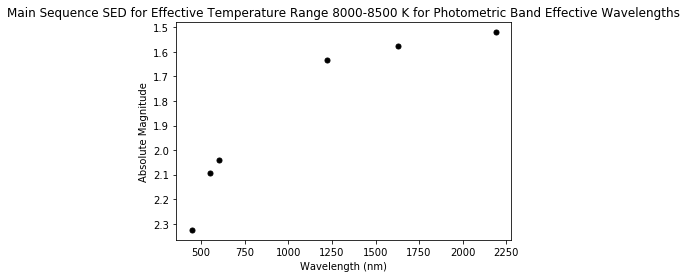

*****Effective Temperature 8500-9000 K*****
The number of main sequence stars in the effective temperature range 8500-9000 is:  226
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 124.217
[-- -- -- ..., -- -- --]
[ 2.23698711  1.68178654  1.75616646  1.96105957  1.68987942  2.5215826
  2.5215826   2.17209339  1.97016907  1.95297909  1.73635483  1.95936298
  1.36467552  2.15448666  1.39278984  1.92409325  1.04102325  2.99011517
  2.90013027  2.22835636  2.32837486  1.75135231  2.10105324  2.53880215
  0.93478775  0.87202168  2.71909904  1.79063129  2.8025589   1.32143497
  2.60137463  1.8327446   2.37098026  0.86939049  2.64198971  2.27194977
  1.85487175  1.85079479  1.08056068  2.67803574  1.85202789  2.41039848
  1.48

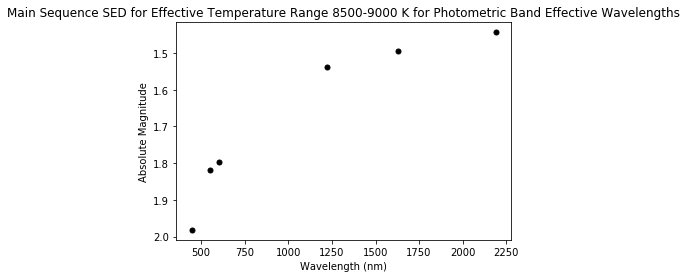

*****Effective Temperature 9000-9500 K*****
The number of main sequence stars in the effective temperature range 9000-9500 is:  89
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 47.6516
[-- -- -- ..., -- -- --]
[ 1.69596863  2.09381962  1.35442924  1.86573029  1.68178463  2.86758995
  1.50570869  1.80567932  2.14339542  1.52540779  1.48756504  1.71338558
  1.87232971  1.69862461  1.71142864  1.31491375  1.4743309   2.39183617
  0.59187603  1.92992306  2.6727562   1.30979824  1.4370327   1.72057724
  2.27371502  1.67721462  2.23165798  1.24269772  1.19079494  2.39377308
  1.66449356  0.81306076  1.97859764  1.21653938  1.26363564  1.13865566
  2.70514202  0.8243885   1.95133877  1.63611889  2.87373924  2.87135983
  2.13

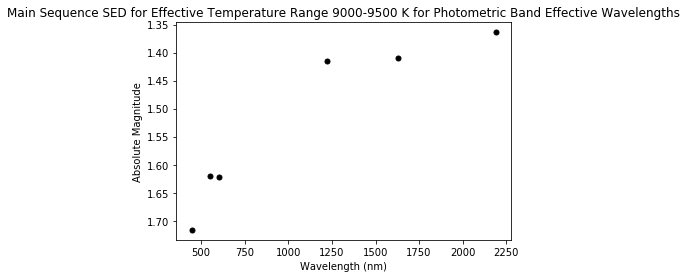

*****Effective Temperature 9500-10000 K*****
The number of main sequence stars in the effective temperature range 9500-10000 is:  90
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 1.14828396  1.88403988  1.200284    0.48077965  1.4213562   0.68013287
  1.52078819  2.06777954  1.37874985  1.76349258  1.63284779  0.87178802
  2.0089035   1.10280132  1.88665485  1.59187222  1.64004707  1.02629375
  0.97390366  1.57409668  0.97163582  1.18605804  1.37421989  1.59477901
  1.5384798   2.5958271   1.98729992  3.90313721  1.05605698  1.27556515
  1.83314228  6.09909248  6.09909248  1.49625969  1.23439503  1.07701683
  1.50339794  1.50339794  0.99063683  1.8708086   1.48037338  1.32900524
  1.345821

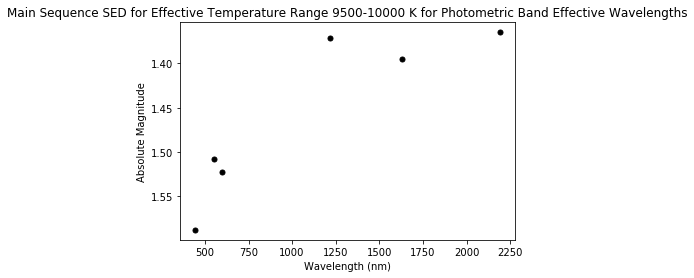

*****Effective Temperature 10000-10500 K*****
The number of main sequence stars in the effective temperature range 10000-10500 is:  31
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 0.86752129  0.75436687  0.7300539   0.89768791  0.99971485  1.00799847
  1.52347755  3.47056484  1.29858494  1.56919193  1.92807865  0.92312813
  0.92312813  1.3101759   1.17199135  1.03303623  0.932827    3.13574505
  1.37069511  1.20811462  1.63647366  0.92645073  1.78036785  1.28885746
  2.63264751  0.17697906  0.87763596  0.70625114  1.99921322  1.58884907
  2.13073635]
1.38066273351


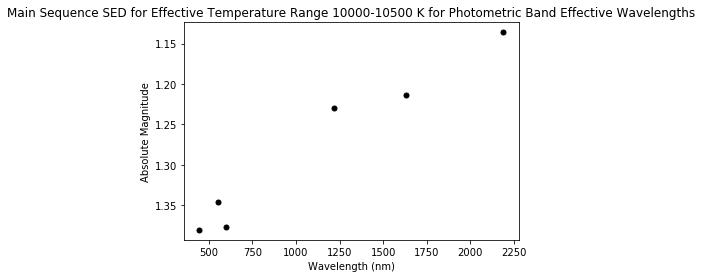

*****Effective Temperature 10500-11000 K*****
The number of main sequence stars in the effective temperature range 10500-11000 is:  31
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 0.86752129  0.75436687  0.7300539   0.89768791  0.99971485  1.00799847
  1.52347755  3.47056484  1.29858494  1.56919193  1.92807865  0.92312813
  0.92312813  1.3101759   1.17199135  1.03303623  0.932827    3.13574505
  1.37069511  1.20811462  1.63647366  0.92645073  1.78036785  1.28885746
  2.63264751  0.17697906  0.87763596  0.70625114  1.99921322  1.58884907
  2.13073635]
1.38066273351


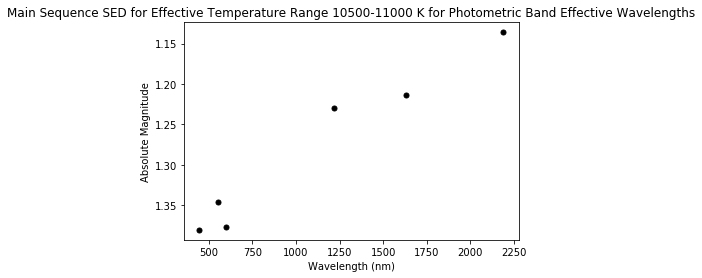

*****Effective Temperature 11000-11500 K*****
The number of main sequence stars in the effective temperature range 11000-11500 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Warning: converting a masked element to nan.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


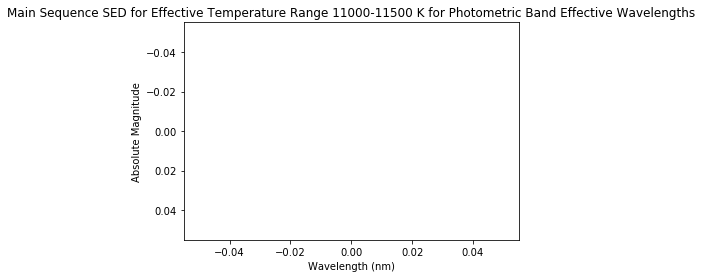

*****Effective Temperature 11500-12000 K*****
The number of main sequence stars in the effective temperature range 11500-12000 is:  10
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 0.92761803  6.03600693 -0.02783585  0.8767662  -0.08442211  0.77200127
 -0.62928391  2.94088745  3.71490765  0.55239773]
1.50790433884


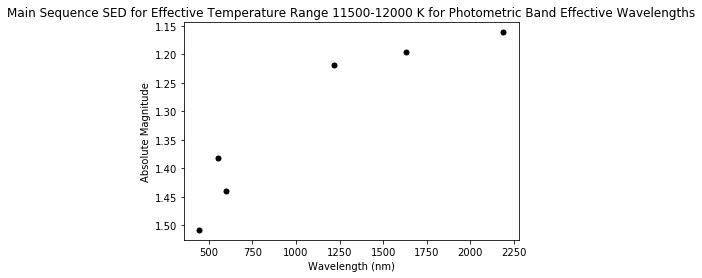

*****Effective Temperature 12000-12500 K*****
The number of main sequence stars in the effective temperature range 12000-12500 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


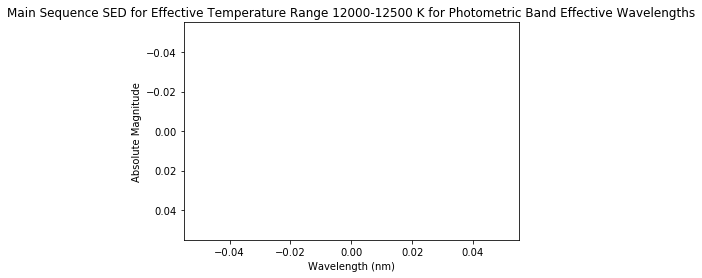

*****Effective Temperature 12500-13000 K*****
The number of main sequence stars in the effective temperature range 12500-13000 is:  2
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 6.69994926  0.48522472]
3.59258699417


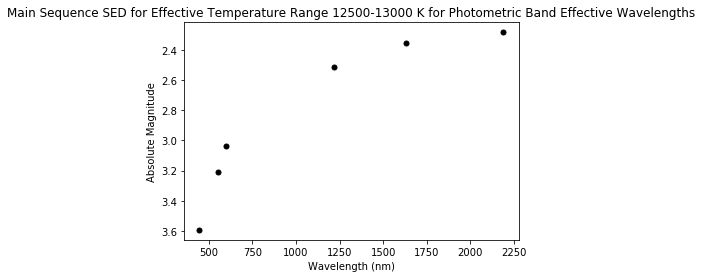

*****Effective Temperature 13000-13500 K*****
The number of main sequence stars in the effective temperature range 13000-13500 is:  2
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: 0
[-- -- -- ..., -- -- --]
[ 6.69994926  0.48522472]
3.59258699417


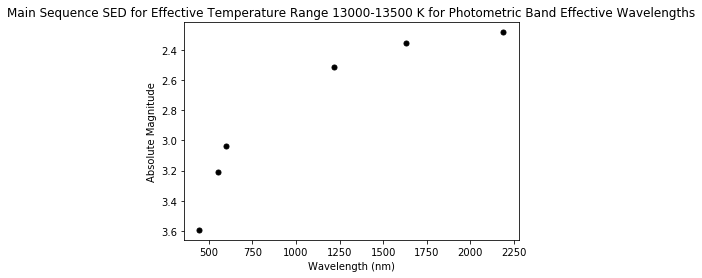

*****Effective Temperature 13500-14000 K*****
The number of main sequence stars in the effective temperature range 13500-14000 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


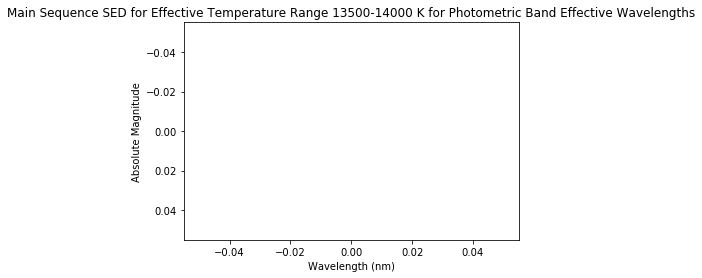

*****Effective Temperature 14000-14500 K*****
The number of main sequence stars in the effective temperature range 14000-14500 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


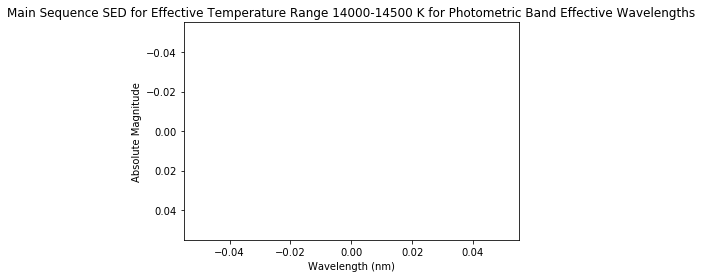

*****Effective Temperature 14500-15000 K*****
The number of main sequence stars in the effective temperature range 14500-15000 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


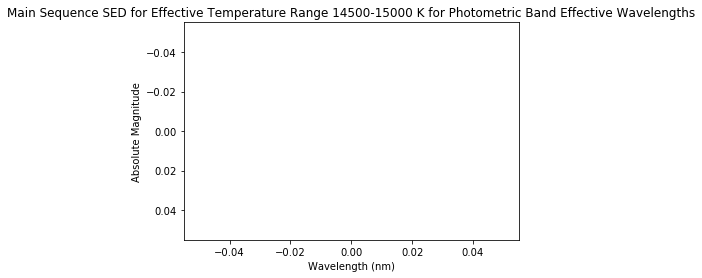

*****Effective Temperature 15000-15500 K*****
The number of main sequence stars in the effective temperature range 15000-15500 is:  0
The mean temperature in this effective temperature range is:  --
The minimum effective temperature of a main sequence star in this range is: nan
The maximum effective temperature of a main sequence star in this range is: nan
The standard deviation of the effective temperatures of main sequence stars in this range is: nan
[-- -- -- ..., -- -- --]
[]
nan


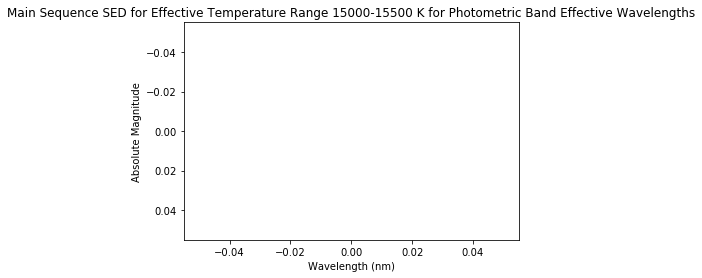

In [66]:
Teff = t["Teff"]
#Defines effective temperature from the column in the table
LowTemperatures=[3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000,14500,15000]
AverageTemperatures=[]
MinimumTemperatures=[]
MaximumTemperatures=[]
TemperatureStandardDeviations=[]
for i in LowTemperatures:
    print('*****Effective Temperature %g-%g K*****'%(i,i+500))
    TeffMask=numpy.ma.masked_outside(MainSequenceTeff,i,i+500)
    n=TeffMask.count()
    print('The number of main sequence stars in the effective temperature range %g-%g is: '%(i,i+500),n)
    MeanTemperature=sum(TeffMask)/n
    print('The mean temperature in this effective temperature range is: ',MeanTemperature)
    AverageTemperatures.append(MeanTemperature)
    MinimumTemperature=min(TeffMask)
    print('The minimum effective temperature of a main sequence star in this range is: %g'%(MinimumTemperature))
    MinimumTemperatures.append(MinimumTemperature)
    MaximumTemperature=max(TeffMask)
    print('The maximum effective temperature of a main sequence star in this range is: %g'%(max(TeffMask)))
    MaximumTemperatures.append(MaximumTemperature)
    TemperatureStandardDeviation=numpy.std(TeffMask)
    print('The standard deviation of the effective temperatures of main sequence stars in this range is: %g'%(numpy.std(TeffMask)))
    TemperatureStandardDeviations.append(TemperatureStandardDeviation)    
    JMask=numpy.ma.array(MainSequenceJabsmag,mask=TeffMask.mask)
    Jplt=numpy.ma.compressed(JMask)
    MeanMainSequenceJplt=numpy.average(Jplt)
    HMask=numpy.ma.array(MainSequenceHabsmag,mask=TeffMask.mask)
    Hplt=numpy.ma.compressed(HMask)
    MeanMainSequenceHplt=numpy.average(Hplt)
    KMask=numpy.ma.array(MainSequenceKabsmag,mask=TeffMask.mask)
    Kplt=numpy.ma.compressed(KMask)
    MeanMainSequenceKplt=numpy.average(Kplt)
    GMask=numpy.ma.array(MainSequenceGabsmag,mask=TeffMask.mask)
    Gplt=numpy.ma.compressed(GMask)
    MeanMainSequenceGplt=numpy.average(Gplt)
    VMask=numpy.ma.array(MainSequenceVabsmag,mask=TeffMask.mask)
    Vplt=numpy.ma.compressed(VMask)
    MeanMainSequenceVplt=numpy.average(Vplt)
    BMask=numpy.ma.array(MainSequenceBabsmag,mask=TeffMask.mask)
    print(BMask)
    Bplt=numpy.ma.compressed(BMask)
    print(Bplt)
    MeanMainSequenceBplt=numpy.average(Bplt)
    print(MeanMainSequenceBplt)
    FilterAbsMag=[MeanMainSequenceBplt,MeanMainSequenceVplt,MeanMainSequenceGplt,MeanMainSequenceJplt,MeanMainSequenceHplt,MeanMainSequenceKplt] 
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute Magnitude')
    plt.title('Main Sequence SED for Effective Temperature Range %g-%g K for Photometric Band Effective Wavelengths'%(i,i+500))
    plt.plot(EffWavelengths,FilterAbsMag,'ko',ms=5)
    plt.gca().invert_yaxis()
    plt.show()
    
    



    
   # plt.xlabel('Absolute J Magnitude')
    #plt.ylabel('Number of Stars')
    #plt.title('Histogram of Absolute J Magnitudes in Effective Temperature Range %g-%g'%(i,i+500))
    #plt.hist(Jplt,bins=30)
    #plt.show()
    #print('The standard deviation in absolute J magnitude for this effective temperature range is: ',numpy.std(Jplt))
    #HMask=numpy.ma.array(absHmags,mask=TeffMask.mask)
    #Hplt=numpy.ma.compressed(HMask)
    #plt.xlabel('Absolute H Magnitude')
    #plt.ylabel('Number of Stars')
    #plt.title('Histogram of Absolute H Magnitudes in Effective Temperature Range %g-%g'%(i,i+500))
    #plt.hist(Hplt,bins=30)
    #plt.show()
    #print('The standard deviation in absolute H magnitude for this effective temperature range is: ',numpy.std(Hplt))
    #KMask=numpy.ma.array(absKmags,mask=TeffMask.mask)
    #Kplt=numpy.ma.compressed(KMask)
    #plt.xlabel('Absolute K Magnitude')
    #plt.ylabel('Number of Stars')
    #plt.title('Histogram of Absolute K Magnitudes in Effective Temperature Range %g-%g'%(i,i+500))
    #plt.hist(Kplt,bins=30)
    #plt.show()
    #print('The standard deviation in absolute K magnitude for this effective temperature range is: ',numpy.std(Kplt))

In [32]:
MeanMainSequenceJabsmag=numpy.average(MainSequenceJabsmag)
print('The mean absolute J magnitude for main sequence stars is: %g'%(MeanMainSequenceJabsmag))
MainSequenceJabsmagStandardDeviation=numpy.std(MainSequenceJabsmag)
print('The standard deviation of the absolute J magnitude for main sequence stars is: %g'%(MainSequenceJabsmagStandardDeviation))
MeanMainSequenceHabsmag=numpy.average(MainSequenceHabsmag)
print('The mean absolute H magnitude for main sequence stars is: %g'%(MeanMainSequenceHabsmag))
MainSequenceHabsmagStandardDeviation=numpy.std(MainSequenceHabsmag)
print('The standard deviation of the absolute H magnitude for main sequence stars is: %g'%(MainSequenceHabsmagStandardDeviation))
MeanMainSequenceKabsmag=numpy.average(MainSequenceKabsmag)
print('The mean absolute K magnitude for main sequence stars is: %g'%(MeanMainSequenceKabsmag))
MainSequenceKabsmagStandardDeviation=numpy.std(MainSequenceKabsmag)
print('The standard deviation of the absolute K magnitude for main sequence stars is: %g'%(MainSequenceKabsmagStandardDeviation))
MeanMainSequenceGabsmag=numpy.average(MainSequenceGabsmag)
print('The mean absolute G magnitude for main sequence stars is: %g'%(MeanMainSequenceGabsmag))
MainSequenceGabsmagStandardDeviation=numpy.std(MainSequenceGabsmag)
print('The standard deviation of the absolute JGmagnitude for main sequence stars is: %g'%(MainSequenceGabsmagStandardDeviation))
MeanMainSequenceVTabsmag=numpy.average(MainSequenceVTabsmag)
print('The mean absolute VT magnitude for main sequence stars is: %g'%(MeanMainSequenceVTabsmag))
MainSequenceVTabsmagStandardDeviation=numpy.std(MainSequenceVTabsmag)
print('The standard deviation of the absolute VT magnitude for main sequence stars is: %g'%(MainSequenceVTabsmagStandardDeviation))





print(MainSequenceKabsmag)
print(numpy.average(MainSequenceKabsmag))
print(sum(MainSequenceKabsmag))

The mean absolute J magnitude for main sequence stars is: 7.53185
The standard deviation of the absolute J magnitude for main sequence stars is: 0.96904
The mean absolute H magnitude for main sequence stars is: 7.25609
The standard deviation of the absolute H magnitude for main sequence stars is: 0.879708
The mean absolute K magnitude for main sequence stars is: nan
The standard deviation of the absolute K magnitude for main sequence stars is: nan
The mean absolute G magnitude for main sequence stars is: 8.40904
The standard deviation of the absolute JGmagnitude for main sequence stars is: 0.942061
The mean absolute VT magnitude for main sequence stars is: 8.66218
The standard deviation of the absolute VT magnitude for main sequence stars is: 0.995642
[7.0159998, 6.2119999, 7.1859999, 7.0549998, 6.7859998, 7.1880002, 5.2319999, 7.8319998, 8.2410002, 7.8709998, 7.112, 7.8800001, 7.086, 7.4169998, 6.4510002, 5.3340001, 6.5079999, 7.6690001, 6.8340001, 4.993, 7.5180001, 6.0900002, 7.55700

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


--


In [59]:
print(Bmag)
print(Babsmag)

  BTmag  
   mag   
---------
   10.684
8.7840004
9.2530003
9.9049997
   12.181
9.4429998
8.8380003
9.1599998
    10.38
9.6750002
      ...
9.0089998
8.6879997
   11.063
     9.54
9.6289997
   10.053
9.9610004
9.5319996
   10.273
8.9980001
Length = 31704 rows
 BTmag 
-------
7.16403
4.52855
 4.9143
7.90169
9.00657
 4.2118
3.40177
5.18602
5.15362
6.87403
    ...
4.97636
4.51945
3.65518
6.09105
7.14634
4.65276
4.57387
4.82895
 4.7839
 5.2903
3.57236
Length = 31704 rows
